# Word Embedding

It is a natural language processing project which maps words by learning from text content that consists of technology news collected from Turkish websites.

The dataset used in this project was downloaded from https://hakan.io/makine-ogrenmesi-turkce-haber-metinleri-veri-seti/

In [1]:
import warnings 
  
warnings.filterwarnings(action="ignore")

### Data

In [2]:
stopwords = [i.strip() for i in open("data/stopwords.txt", "r").readlines()]

In [3]:
import pandas as pd

data = pd.DataFrame(open("data/news.txt", "r").readlines(), columns =["News"])
data.head()

,News
0,"'Sürücüsüz otomobil yola çıktı', 'Modifiye oto..."
1,'Akıllı telefon bağımlılığına karşı \'Vekil Te...
2,'iPhone X ile iPhone 8 Plus karşı karşıya: Dah...
3,'Avrupa devleri hibrit elektrikli uçak için ko...
4,'11 yaşındaki kız 25 bin dolar değerindeki bil...


##### Lowercase

In [4]:
data["News"] = data["News"].apply(lambda x: " ".join(x.lower() for x in x.split()))
data.head()

,News
0,"'sürücüsüz otomobil yola çıktı', 'modifiye oto..."
1,'akıllı telefon bağımlılığına karşı \'vekil te...
2,'iphone x ile iphone 8 plus karşı karşıya: dah...
3,'avrupa devleri hibrit elektrikli uçak için ko...
4,'11 yaşındaki kız 25 bin dolar değerindeki bil...


##### Remove punctuations

In [5]:
data["News"] = data["News"].str.replace('[^\w\s]', '')
data.head()

,News
0,sürücüsüz otomobil yola çıktı modifiye otomobi...
1,akıllı telefon bağımlılığına karşı vekil telef...
2,iphone x ile iphone 8 plus karşı karşıya daha ...
3,avrupa devleri hibrit elektrikli uçak için kol...
4,11 yaşındaki kız 25 bin dolar değerindeki bili...


##### Remove stopwords

In [6]:
data["News"] = data["News"].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))
data.head()

,News
0,sürücüsüz otomobil yola çıktı modifiye otomobi...
1,akıllı telefon bağımlılığına karşı vekil telef...
2,iphone x iphone 8 plus karşı karşıya küçük kas...
3,avrupa devleri hibrit elektrikli uçak kolları ...
4,11 yaşındaki kız 25 dolar değerindeki bilim öd...


##### Frequent words

In [7]:
freq = pd.Series(" ".join(data["News"]).split()).value_counts()[:10]
freq

yeni         57
iphone       41
r            32
telefon      30
ilk          29
2            28
satışa       24
teknoloji    24
sahip        23
apple        23
dtype: int64

In [8]:
# Remove frequent words

data["News"] = data["News"].apply(lambda x: " ".join(x for x in x.split() if x not in list(freq.index)))
data["News"].head()

0    sürücüsüz otomobil yola çıktı modifiye otomobi...
1    akıllı bağımlılığına karşı vekil avusturyalı t...
2    x 8 plus karşı karşıya küçük kasa büyük ekran ...
3    avrupa devleri hibrit elektrikli uçak kolları ...
4    11 yaşındaki kız 25 dolar değerindeki bilim öd...
Name: News, dtype: object

##### Rare words

In [9]:
rare = pd.Series(" ".join(data["News"]).split()).value_counts()[-10:]
rare

ölçebilen          1
girilmiş           1
ayarlayan          1
sonlandırma        1
banka              1
finlandiyalılar    1
görebilir          1
gözleri            1
amerikanın         1
jambonun           1
dtype: int64

In [10]:
# Remove rare words

data["News"] = data["News"].apply(lambda x: " ".join(x for x in x.split() if x not in list(rare.index)))
data["News"].head()

0    sürücüsüz otomobil yola çıktı modifiye otomobi...
1    akıllı bağımlılığına karşı vekil avusturyalı t...
2    x 8 plus karşı karşıya küçük kasa büyük ekran ...
3    avrupa devleri hibrit elektrikli uçak kolları ...
4    11 yaşındaki kız 25 dolar değerindeki bilim öd...
Name: News, dtype: object

### Pre-processing

##### ASCII character correction

In [11]:
from lib.turkish_deasciifier.turkish.deasciifier import Deasciifier
    
data["News"] = data["News"].apply(lambda x: Deasciifier(x).convert_to_turkish())
    
data["News"].head()

0    sürücüsüz otomobil yola çıktı modifiye otomobi...
1    akıllı bağımlılığına karşı vekil avusturyalı t...
2    x 8 plus karşı karşıya küçük kasa büyük ekran ...
3    avrupa devleri hibrit elektrikli uçak kolları ...
4    11 yasındaki kız 25 dolar değerindeki bilim öd...
Name: News, dtype: object

##### Tokenization

In [12]:
from lib.turkish_nltk.trnltk.tokenizer.texttokenizer import TextTokenizer

data["Token"] = data["News"].apply(lambda x: list(TextTokenizer().tokenize(x)))
    
data["Token"].head()

0    [sürücüsüz, otomobil, yola, çıktı, modifiye, o...
1    [akıllı, bağımlılığına, karşı, vekil, avustury...
2    [x, 8, plus, karşı, karşıya, küçük, kasa, büyü...
3    [avrupa, devleri, hibrit, elektrikli, uçak, ko...
4    [11, yasındaki, kız, 25, dolar, değerindeki, b...
Name: Token, dtype: object

##### Stemming

In [13]:
from TurkishStemmer import TurkishStemmer

data["Stem"] = data["Token"].apply(lambda x: " ".join(TurkishStemmer().stem(x) for x in x))

data["Stem"].head()

0    sürücüs otomobil yol çıkt modifi otomobil 12 s...
1    akıl bağımlılık karş vekil avusturya tasarımç ...
2    x 8 plus karş karşı küçük kas büyük ekran 8 in...
3    avrup dev hibrit elektrik uçak kol sıva bbcde ...
4    11 yas kız 25 do değer bil ödül sahip geliştir...
Name: Stem, dtype: object

##### Lemmatization

In [14]:
'''
from lib.turkish_lemmer.trLemmer import MorphAnalyzer

data["Lemma"] = data["Token"].apply(lambda x: " ".join(MorphAnalyzer().lemmatize(x)[0] for x in x))
    
data["Lemma"].head()
'''

'\nfrom lib.turkish_lemmer.trLemmer import MorphAnalyzer\n\ndata["Lemma"] = data["Token"].apply(lambda x: " ".join(MorphAnalyzer().lemmatize(x)[0] for x in x))\n    \ndata["Lemma"].head()\n'

### Processing

In [15]:
from gensim.models import Word2Vec

# CBOW model

model = Word2Vec(data["Stem"].str.split(), min_count=1, size=100, window=5)

In [25]:
# Vocabulary

list(model.wv.vocab.items())[-5:]

[('ortaklaş', <gensim.models.keyedvectors.Vocab at 0x133ad0e50>),
 ('40mp', <gensim.models.keyedvectors.Vocab at 0x133ad0e90>),
 ('24mp', <gensim.models.keyedvectors.Vocab at 0x133ad0ed0>),
 ('konumlandır', <gensim.models.keyedvectors.Vocab at 0x133ad0f10>),
 ('düşünce', <gensim.models.keyedvectors.Vocab at 0x133ad0f50>)]

In [26]:
# Vector

model.wv["telefon"]

array([-3.4778304e-03,  5.5080530e-04,  3.6154594e-03, -1.8775159e-03,
        5.3544482e-04, -9.1812071e-05, -3.8553784e-03,  4.2129336e-03,
       -2.5464124e-03, -6.1205988e-06, -6.6787371e-04,  1.7465259e-03,
       -2.7841234e-03, -2.2186574e-05, -2.0256257e-03, -1.1085522e-03,
        2.4923349e-03,  1.0671208e-03,  2.9641120e-03,  1.4958902e-03,
        1.9286065e-03, -1.9507603e-03,  5.0736386e-03,  1.4734865e-03,
       -2.9041101e-03,  3.5564131e-03, -1.4397081e-03,  2.1380030e-03,
       -3.3659660e-03, -4.4720974e-03, -5.3189164e-03, -2.0100469e-04,
        1.0000596e-04,  1.8129920e-03, -2.3313535e-03,  1.3342750e-03,
       -2.9368806e-04,  1.8457740e-03, -4.0894988e-04, -1.5309623e-03,
       -4.5725345e-03, -2.0436139e-03, -2.8442098e-03,  5.0206906e-03,
        1.4184555e-03,  2.8035895e-03, -2.1325606e-03,  2.6299972e-03,
        3.3148683e-03,  5.6018448e-04, -2.3754782e-04, -1.5625466e-03,
        2.5549445e-03,  4.7019692e-03, -5.7138538e-04, -4.9100104e-03,
      

In [59]:
# Similarity

model.wv.similarity("teknoloji", "elektrik")

0.2823229

In [60]:
# Most similars

model.wv.most_similar("telefon")[:5]

[('can', 0.3554137349128723),
 ('dayanıyor', 0.3389485478401184),
 ('storedan', 0.3328704833984375),
 ('gideriyor', 0.3307874798774719),
 ('5g', 0.2859043478965759)]

In [61]:
# Output prediction

model.predict_output_word(["cep", "telefon"], topn=5)

[('klavye', 0.00034662604),
 ('mp', 0.0003466254),
 ('cep', 0.0003466249),
 ('uygulama', 0.00034662464),
 ('ark', 0.0003466246)]

##### Visualization

In [62]:
import matplotlib.pyplot as plt

%matplotlib inline

def draw(x, y, labels):
    plt.figure(figsize=(15, 15))
    
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i], xy=(x[i], y[i]), xytext=(5, 2),
                     textcoords="offset points", ha="right", va="bottom")
        
    return plt

In [69]:
from sklearn.manifold import TSNE

def tsne(model):
    labels = [word for word in model.wv.vocab]
    tokens = [model.wv[word] for word in model.wv.vocab]
    
    tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = [val[0] for val in new_values]
    y = [val[1] for val in new_values]
    
    return draw(x, y, labels)

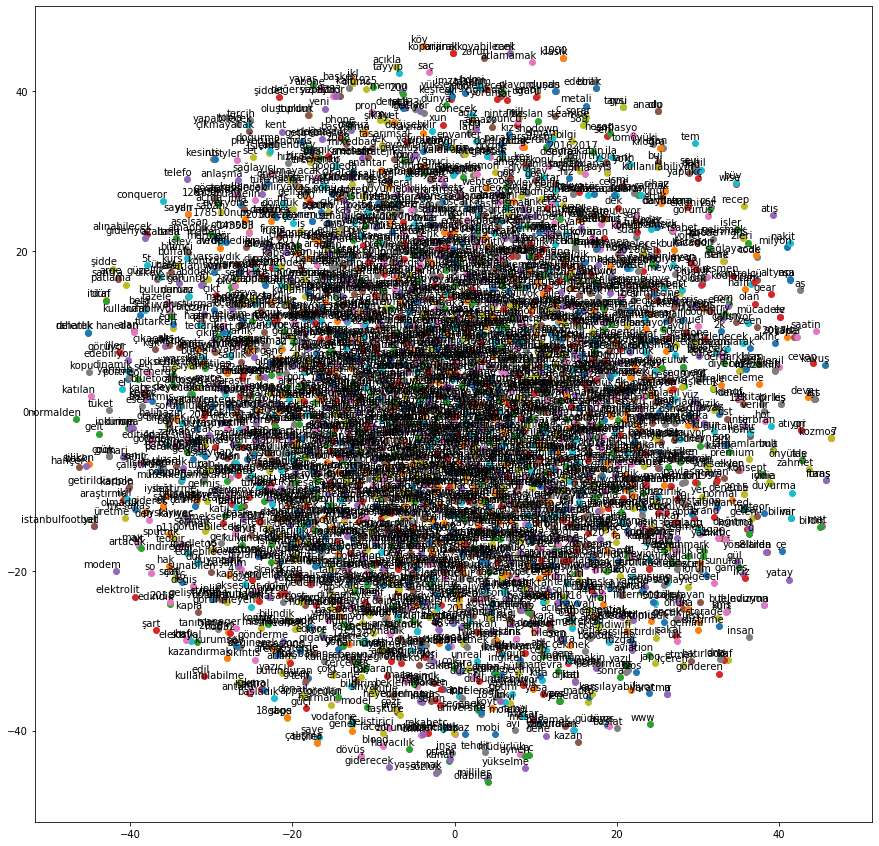

In [70]:
graph = tsne(model)
graph.show()